In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
transform = transforms.ToTensor()
train_data_set = datasets.MNIST(root='C:\\Users\\harshi\\dataset\\mnist_train', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='C:\\Users\\harshi\\dataset\\mnist_test', train=False, download=True, transform=transform)
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\harshi\dataset\mnist_train
    Split: Train
    StandardTransform
Transform: ToTensor()

In [2]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\harshi\dataset\mnist_test
    Split: Test
    StandardTransform
Transform: ToTensor()

In [3]:
batch_sizes = [256, 1024]
train_loader1 = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)
train_loader2 = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)

In [4]:
def CalcParams(model):
    return sum(params.numel() for params in model.parameters() if params.requires_grad)

In [5]:
class Model1(nn.Module):
    def __init__(self, input_size=784, hidden1_size=40, hidden2_size=60, output_size=10):
        super(Model1, self).__init__()

        # Using nn.Sequential for better readability
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )

    def forward(self, x):
        return self.network(x)
model1=Model1()
model1

Model1(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=10, bias=True)
  )
)

In [6]:
model1params=CalcParams(model1)
print(model1params)

34470


In [7]:
crit_loss1 = nn.CrossEntropyLoss()
optim1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [8]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
train_losses_mod1=[]
test_losses_mod1=[]
for i in range(epochs):
    train_corr = 0
    test_corr = 0
    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model1(X_train.view(-1,784))  
        trn_loss = crit_loss1(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optim1.zero_grad()
        trn_loss.backward()
        optim1.step()
        
    train_losses_mod1.append(trn_loss)
    train_correct_mod1.append(train_corr)
        
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            y_val = model1(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    test_loss = crit_loss1(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_correct_mod1.append(test_corr)  

In [9]:
train_loss_list=[]
for i in range(len(train_losses_mod1)):
     train_loss_list.append(train_losses_mod1[i].detach().numpy())
test_loss_list=[]
for i in range(len(test_losses_mod1)):
     test_loss_list.append(test_losses_mod1[i].detach().numpy())
train_accuracy_list=[]
for i in range(len(train_correct_mod1)):
     train_accuracy_list.append(train_correct_mod1[i].detach().numpy()/600)
test_accuracy_list=[]
for i in range(len(test_correct_mod1)):
     test_accuracy_list.append(test_correct_mod1[i].detach().numpy()/100)

In [10]:
class Model2(nn.Module):
    def __init__(self, input_size=784, hidden1_size=40, hidden2_size=60, output_size=10):
        super(Model2, self).__init__()

        # Using nn.Sequential for better readability
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )

    def forward(self, x):
        return self.network(x)
model2=Model2()
model2

Model2(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=10, bias=True)
  )
)

In [11]:
model2params=CalcParams(model2)
print(model2params)

34470


In [12]:
crit_loss2 = nn.CrossEntropyLoss()
optim2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [13]:
epochs = 10
train_losses_mod2=[]
test_losses_mod2=[]
train_correct_mod2 = []
test_correct_mod2 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader2):
       
        y_pred = model2(X_train.view(-1,784))  
        loss = crit_loss2(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        optim2.zero_grad()
        loss.backward()
        optim2.step()
        
    train_losses_mod2.append(loss)
    train_correct_mod2.append(train_corr)
        
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            y_val = model2(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    loss = crit_loss2(y_val, y_test)
    test_losses_mod2.append(loss)
    test_correct_mod2.append(test_corr)    

In [14]:
for i in range(len(train_losses_mod2)):
     train_loss_list.append(train_losses_mod2[i].detach().numpy())
for i in range(len(test_losses_mod2)):
     test_loss_list.append(test_losses_mod2[i].detach().numpy())
for i in range(len(train_correct_mod2)):
     train_accuracy_list.append(train_correct_mod2[i].detach().numpy()/600)
for i in range(len(test_correct_mod2)):
     test_accuracy_list.append(test_correct_mod2[i].detach().numpy()/100)

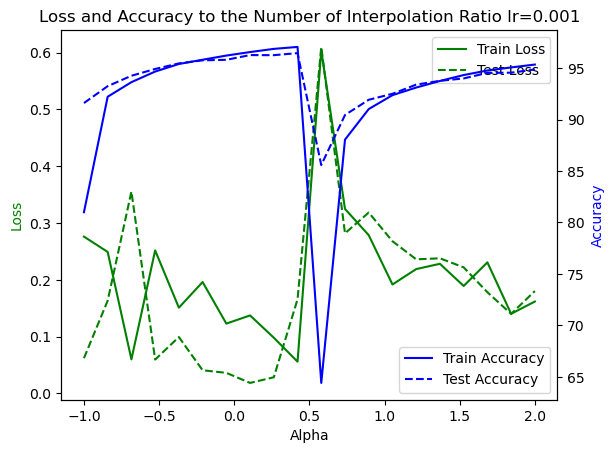

In [15]:
# Generate alpha values for interpolation
alpha = np.linspace(-1.0, 2.0, num=20)
theta_arr = [(1 - a) * model1params + a * model2params for a in alpha]

# Create subplots with twin axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot losses on ax1
ax1.plot(alpha, train_loss_list, color='green', label='Train Loss')
ax1.plot(alpha, test_loss_list, color='green', linestyle='--', label='Test Loss')

# Plot accuracies on ax2
ax2.plot(alpha, train_accuracy_list, color='blue', label='Train Accuracy')
ax2.plot(alpha, test_accuracy_list, color='blue', linestyle='--', label='Test Accuracy')

# Set plot titles and labels
ax1.set_title('Loss and Accuracy to the Number of Interpolation Ratio lr=0.001')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='green')
ax2.set_ylabel('Accuracy', color='blue')

# Set legends for both axes
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.show()


In [16]:
#############################################   Model lr=0.01   ################################################################

In [17]:
class ModelOne(nn.Module):
    def __init__(self, input_size=784, hidden1_size=40, hidden2_size=60, output_size=10):
        super(ModelOne, self).__init__()
        
        # Define layers
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

# Instantiate model, loss function, and optimizer
model_one = ModelOne()
model_one


ModelOne(
  (layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=10, bias=True)
  )
)

In [18]:
crit_loss_one = nn.CrossEntropyLoss()
optim_one = torch.optim.Adam(model_one.parameters(), lr=0.01)


In [19]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
train_losses_mod1=[]
test_losses_mod1=[]

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model_one(X_train.view(-1,784))  
        trn_loss = crit_loss_one(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optim_one.zero_grad()
        trn_loss.backward()
        optim_one.step()

    train_losses_mod1.append(trn_loss)
    train_correct_mod1.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            y_val = model_one(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()

    test_loss = crit_loss_one(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_correct_mod1.append(test_corr)     

In [20]:
train_loss_list=[]
for i in range(len(train_losses_mod1)):
     train_loss_list.append(train_losses_mod1[i].detach().numpy())
test_loss_list=[]
for i in range(len(test_losses_mod1)):
     test_loss_list.append(test_losses_mod1[i].detach().numpy())
train_accuracy_list=[]
for i in range(len(train_correct_mod1)):
     train_accuracy_list.append(train_correct_mod1[i].detach().numpy()/600)
test_accuracy_list=[]
for i in range(len(test_correct_mod1)):
     test_accuracy_list.append(test_correct_mod1[i].detach().numpy()/100)

In [21]:
#-Model 2lr=0.01-

In [22]:
class ModelTwo(nn.Module):
    def __init__(self, input_size=784, hidden1_size=40, hidden2_size=60, output_size=10):
        super(ModelTwo, self).__init__()
        
        # Define layers
        self.layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, output_size)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

# Instantiate model, loss function, and optimizer
model_two = ModelTwo()
model_two

ModelTwo(
  (layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=10, bias=True)
  )
)

In [23]:
crit_loss_two = nn.CrossEntropyLoss()
optim_two = torch.optim.Adam(model_two.parameters(), lr=0.01)

In [24]:
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
train_losses_mod2=[]
test_losses_mod2=[]

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader2):
       
        y_pred = model_two(X_train.view(-1,784))  
        trn_loss = crit_loss_two(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

        optim_two .zero_grad()
        trn_loss.backward()
        optim_two .step()

    train_losses_mod2.append(trn_loss)
    train_correct_mod2.append(train_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            y_val = model_two(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()

    test_loss = crit_loss_two(y_val, y_test)
    test_losses_mod2.append(test_loss)
    test_correct_mod2.append(test_corr)       

In [25]:
for i in range(len(train_losses_mod2)):
     train_loss_list.append(train_losses_mod2[i].detach().numpy())
for i in range(len(test_losses_mod2)):
     test_loss_list.append(test_losses_mod2[i].detach().numpy())
for i in range(len(train_correct_mod2)):
     train_accuracy_list.append(train_correct_mod2[i].detach().numpy()/600)
for i in range(len(test_correct_mod2)):
     test_accuracy_list.append(test_correct_mod2[i].detach().numpy()/100)

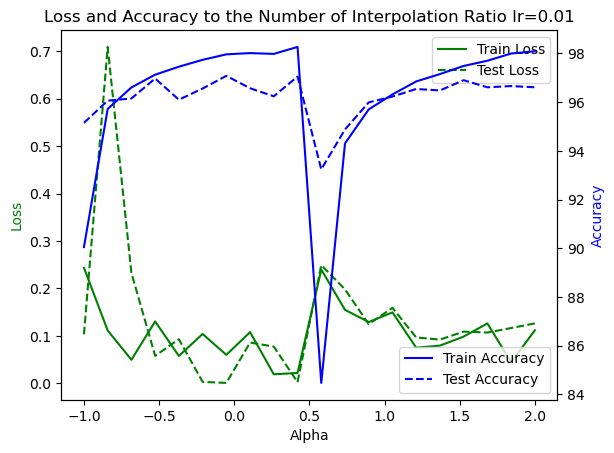

In [26]:
# Generate alpha values for interpolation
alpha = np.linspace(-1.0, 2.0, num=20)
theta_arr = [(1 - a) * model1params + a * model2params for a in alpha]

# Create subplots with twin axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot losses on ax1
ax1.plot(alpha, train_loss_list, color='green', label='Train Loss')
ax1.plot(alpha, test_loss_list, color='green', linestyle='--', label='Test Loss')

# Plot accuracies on ax2
ax2.plot(alpha, train_accuracy_list, color='blue', label='Train Accuracy')
ax2.plot(alpha, test_accuracy_list, color='blue', linestyle='--', label='Test Accuracy')

# Set plot titles and labels
ax1.set_title('Loss and Accuracy to the Number of Interpolation Ratio lr=0.01')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='green')
ax2.set_ylabel('Accuracy', color='blue')

# Set legends for both axes
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.show()
